# Metaheurística de Enxame de Partículas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

### Vamos otimizar a função de Rastrigin, dada por:

$z(x_{1},x_{2}) = 2a + x_{1}^{2} + x_{2}^{2} - a(cos(2\pi x_{2})+cos(2\pi x_{1}))$

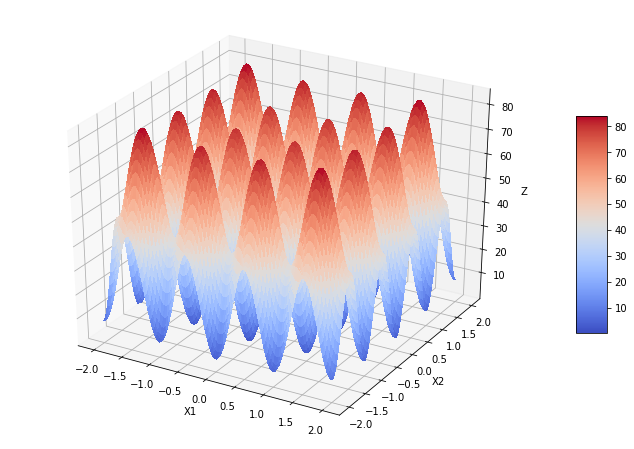

In [2]:
def rastrigin(x1,x2):
    
    a = 20
    
    return 2*a + x1**2 + x2**2 - a*(np.cos(2*3.1415*x1)+np.cos(2*3.1415*x2))

step = 100

x1 = np.linspace(-2, 2, step)
x2 = np.linspace(-2, 2, step)

x1, x2 = np.meshgrid(x1,x2)

z = rastrigin(x1,x2)

fig = plt.figure(figsize=(12,8))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()

Seu Mínimo Global está localizado em $(0,0)$.

# Desenvolvendo o Algoritmo de Enxame de Partículas

In [102]:
# Função Para Inicializar a População Aleatória

def inicializa_enxame(lim_superior,lim_inferior,n_individuos):
    
    enxame = np.random.uniform(lim_inferior,lim_superior,size=([n_individuos,2]))

    z_inicial = rastrigin(enxame[:,0], enxame[:,1])
    
    return enxame, z_inicial


# Função Inicializar Velocidades Aleatórias 

def inicializa_velocidades(n_individuos, lim_superior, fator):
    
    vel = fator*np.random.uniform(lim_inferior,lim_superior,size=([n_individuos,2]))

    return vel


# Função Para Cálculo do Peso de Inércia

def peso_inercia(wmin,wmax, iteracao, max_iter):
        
    w = wmax - (wmax-wmin)*iteracao/max_iter
    

    return w

# Função Para Atualização da Velocidade e Posição

def atualiza_vel_posi(gbest, pbest, enxame, peso, vant,c1,c2, n_indiv):
        
    r1 = np.random.uniform(0,1)
    r2 = np.random.uniform(0,1)
    
    vel_new = vant*peso + c1*r1*(-enxame+gbest) + c2*r2*(-enxame+pbest)

    posi = enxame+vel_new
    
    return vel_new, posi


# Função Para Atualização de Gbest e Pbest

def atualiza_gbest_pbest(enxame, memoria):
    
    z = rastrigin(enxame[:,0], enxame[:,1])
    
    z_mem = rastrigin(memoria[:,0], memoria[:,1])
    

    posi = np.argmin(z)
    
    val = np.min(z)
    
    gbest = enxame[posi,:]
    
    for i in range(len(z)):
        
        if z[i] < z_mem[i]:
        
            memoria[i,:] = enxame[i,:]
            
        if val > np.min(z_mem):
        
            posi = np.argmin(z_mem)
    
            val = np.min(z_mem)

            gbest = memoria[posi,:]

    
    
            
            
    return val, gbest, memoria


# Função para PLOT Animado

def animate(x1,x2,ims,ax2):
    z = rastrigin(x1,x2)
    im = ax2.plot(x1,x2,"o",c='red')
    ims.append(im)
    return ims

# Algoritmo Completo

def enxame_particulas(n_individuos, lim_inferior, lim_superior, max_iter, wmax, wmin, c1, c2, fator):
    
    f_best = []

    x1_otimo = []
    
    x2_otimo = []
    
    historico_x1 = []
    
    historico_x2 = []
    
   
    enxame, z_init = inicializa_enxame(lim_superior,lim_inferior,n_individuos)
    
    v_new = inicializa_velocidades(n_individuos, lim_superior, fator)
    
    f_best.append(z_init.min())

    x1_otimo.append(enxame[np.argmin(z_init),0])
    
    x2_otimo.append(enxame[np.argmin(z_init),1])
    
    for k in range(max_iter):
        
        if k ==0:
            
            memoria = np.copy(enxame)
        
        wk = peso_inercia(wmin,wmax, k, max_iter)
        
        
        vant = np.copy(v_new)
        
        valor, gbest, pbest = atualiza_gbest_pbest(enxame, memoria)
        
        f_best.append(valor)

        x1_otimo.append(gbest[0])

        x2_otimo.append(gbest[1])
        
        v_new, enxame_new = atualiza_vel_posi(gbest, pbest, enxame, wk, vant,c1,c2, n_individuos)
        
        enxame_new[enxame_new>lim_superior] = lim_superior
        
        enxame_new[enxame_new<lim_inferior] = lim_inferior
        
        v_new[v_new>0.5*lim_superior] = 0.5*lim_superior
        
        v_new[v_new<-0.5*lim_superior] = -0.5*lim_superior
        
        enxame = np.copy(enxame_new)
        memoria = np.copy(pbest)
        
        historico_x1.append(enxame[:,0])
        historico_x2.append(enxame[:,1])
                        
       
   
    return f_best, x1_otimo, x2_otimo, historico_x1, historico_x2


def visualiza_resultados(funcao_objetivo, lista_x1, lista_x2):

    plt.figure(figsize=(8,16))
    plt.subplot(3,1,1)
    plt.plot(funcao_objetivo)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('Função Objetivo')
    plt.title('Minimização da Função de Rastrigin')

    plt.subplot(3,1,2)
    plt.plot(lista_x1)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('X1')
    plt.title('Variação de X1')

    plt.subplot(3,1,3)
    plt.plot(lista_x2)
    plt.grid()
    plt.xlabel('Iteração')
    plt.ylabel('X2')
    plt.title('Variação de X2')

    print('X1 Ótimo: ', lista_x1[-1])

    print('X2 Ótimo: ', lista_x2[-1])

    print('Função Objetivo Valor Ótimo: ', funcao_objetivo[-1])


In [108]:
n_individuos = 30

lim_inferior = -4

lim_superior = 4

max_iter = 100

c1 = 2
c2 = 2

wmax = 0.9
wmin = 0.4

fator = 0.1

funcao_objetivo, lista_x1, lista_x2, h_x1, h_x2 = enxame_particulas(n_individuos, lim_inferior, lim_superior, max_iter, wmax, wmin, c1, c2, fator)

# Visualização dos Resultados


Como trata-se de uma metaheurística, não há garantia de convergência. Além do mais, por ser uma função não-convexa, apresenta diversos mínimos locais. No geral, os resultados estão próximos do ponto ótimo (1,1) com valor de função objetivo = 0.

X1 Ótimo:  -6.5239662260866945e-06
X2 Ótimo:  -0.0001505306100949332
Função Objetivo Valor Ótimo:  8.984573625525627e-06


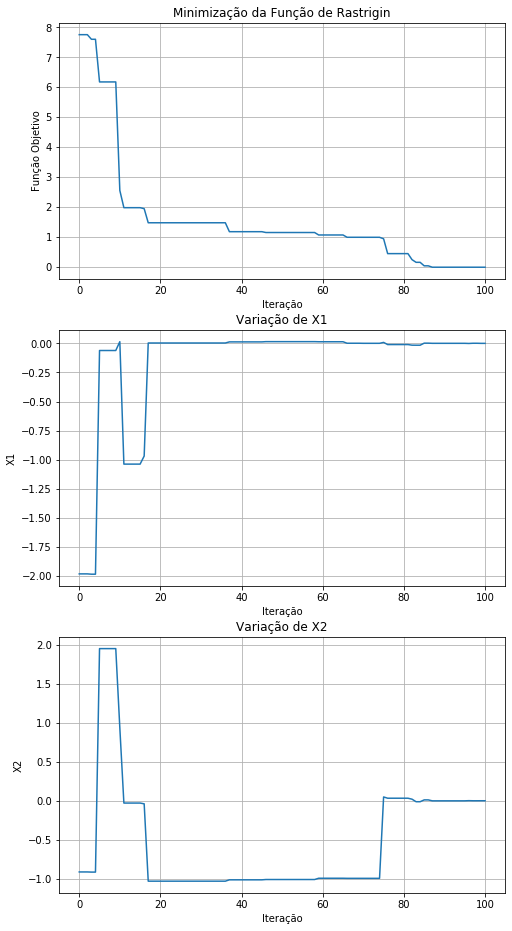

In [109]:
visualiza_resultados(funcao_objetivo, lista_x1, lista_x2)

# Visualização da Convergência

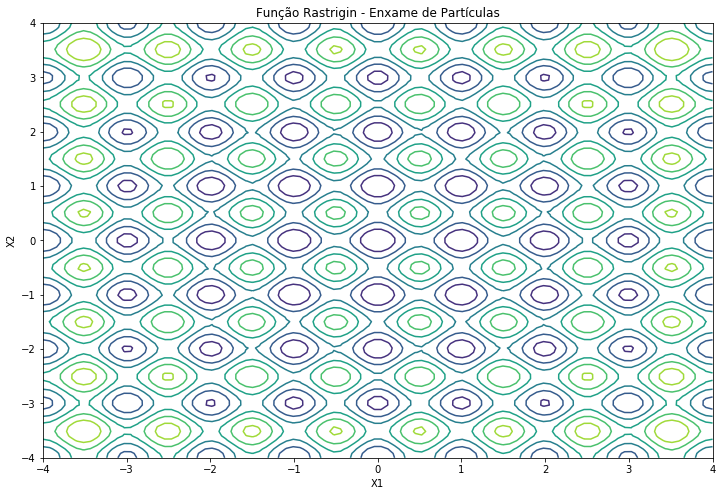

In [110]:
fig, ax = plt.subplots(figsize=(12,8))

step = 100

x1 = np.linspace(-4, 4, step)
x2 = np.linspace(-4, 4, step)

x1, x2 = np.meshgrid(x1,x2)

z = rastrigin(x1,x2)

plt.contour(x1,x2,z)

plt.title('Função Rastrigin - Enxame de Partículas')

plt.xlabel('X1')


plt.ylabel('X2')
     
ims = []


# ax2.plot_wireframe(x1,x2,z)

for i in range(len(h_x1)):

    ims = animate(h_x1[i],h_x2[i],ims,ax)

anim = animation.ArtistAnimation(fig,ims, interval=200, repeat_delay=1000)

HTML(anim.to_html5_video())

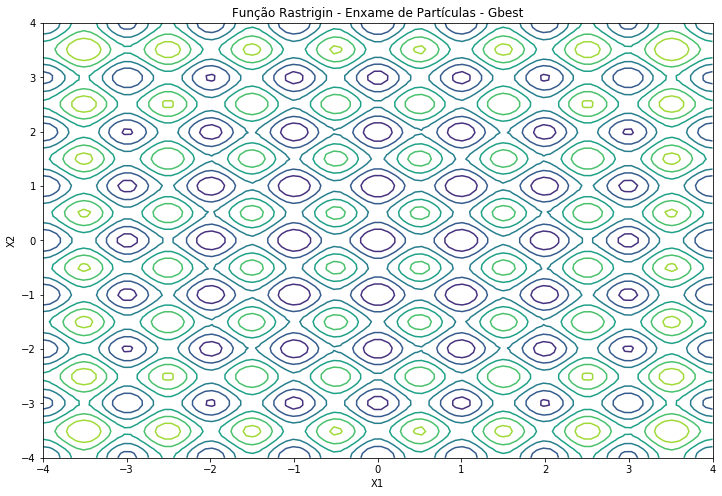

In [111]:
fig, ax = plt.subplots(figsize=(12,8))

step = 100

x1 = np.linspace(-4, 4, step)
x2 = np.linspace(-4, 4, step)

x1, x2 = np.meshgrid(x1,x2)

z = rastrigin(x1,x2)

plt.contour(x1,x2,z)

plt.title('Função Rastrigin - Enxame de Partículas - Gbest')

plt.xlabel('X1')


plt.ylabel('X2')
     
ims = []


# ax2.plot_wireframe(x1,x2,z)

for i in range(len(lista_x1)):

    ims = animate(lista_x1[i],lista_x2[i],ims,ax)

anim = animation.ArtistAnimation(fig,ims, interval=200, repeat_delay=1000)

HTML(anim.to_html5_video())